# Project  Linear Regression

## Part 1 - superficial analysis

### 1. Importing Libraries and Exploring data

1. Importando Bibliotecas

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

2. Importando Datasets

In [2]:
diamonds=pd.read_csv('./diamonds.csv')
rick=pd.read_csv('./rick_diamonds.csv')

### 2. Exploring the data

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [4]:
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [5]:
diamonds.shape

(48940, 10)

In [6]:
rick.shape

(5000, 9)

### 3. Finding the mean price and creating a new column

In [7]:
diamonds['price'].mean()

3934.409644462607

In [8]:
diamonds['estimated_price']=diamonds['price'].mean()

In [9]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,estimated_price
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3934.409644
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3934.409644
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3934.409644
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3934.409644
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3934.409644


### 4.  Check Score

In [10]:
mse=mean_squared_error(diamonds['price'],diamonds['estimated_price'])

In [11]:
np.sqrt(mse)

3989.293102899151

In [12]:
#Erro em dolares = 3989,29

### 5. Setting price_predictedcolumn to rick's df

In [13]:
rick['price_predicted']=diamonds['estimated_price']

In [14]:
rick['price_predicted']=rick['price_predicted'].round(2)

In [15]:
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3934.41
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3934.41
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3934.41
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3934.41
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3934.41


### 6. Exporting data to CSV

In [16]:
rick.to_csv('rick_price_predicted.csv',index=False)

## Part 2 - deeper analysis

#### 1. Attempt to clean data by removing all columns of strings from df

In [17]:
diamonds.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,estimated_price
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3934.409644
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3934.409644


In [18]:
model=LinearRegression()
X=diamonds.drop(['cut','color','clarity','price'],axis=1)
y=diamonds['price']

In [19]:
model.fit(X,y)
model.coef_

array([ 1.06994873e+04, -2.03980948e+02, -1.01808248e+02, -1.30955597e+03,
        5.58533398e+01,  4.03931512e+01, -8.07163479e-01])

In [20]:
model.score(X,y)

0.860332196313374

In [21]:
np.sqrt(mean_squared_error(diamonds['price'],model.predict(X)))

1490.884837858107

#### 2. Attempt to clean data by transforming the strings into numerals

1. Extraindo indormação da df Diamonds

In [22]:
X=diamonds.drop(['price','estimated_price'],axis=1)
y=diamonds['price']

In [23]:
X.cut.unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [24]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0.24,62.8,57.0,3.94,3.96,2.48,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [25]:
model.fit(X,y)
model.coef_

array([ 1.12884762e+04, -6.51224562e+01, -2.56129349e+01, -1.02008175e+03,
        3.99048870e+00, -4.23245676e+01,  5.51647461e+02,  8.13847912e+02,
        7.39756470e+02,  7.01508542e+02, -2.06132091e+02, -2.74652811e+02,
       -4.83528588e+02, -9.74334457e+02, -1.47162263e+03, -2.37934918e+03,
        5.32529975e+03,  3.65104741e+03,  2.68867331e+03,  4.56208834e+03,
        4.25363444e+03,  4.99384291e+03,  4.93604237e+03])

In [26]:
y_pred = model.predict(X)

2. Extraindo indormação da df Diamonds

In [27]:
rick.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3934.41
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3934.41


In [28]:
X_rick=rick.drop(['price_predicted'],axis=1)

In [29]:
X_rick=pd.get_dummies(X_rick,drop_first=True)
X_rick.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.91,63.4,57.0,6.10,6.18,3.89,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0.38,60.3,61.0,4.68,4.71,2.83,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.52,61.8,56.0,5.19,5.16,3.20,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1.10,61.3,56.0,6.65,6.69,4.09,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.28,61.6,57.0,8.44,8.37,5.18,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
y_pred_rick=model.predict(X_rick)

In [44]:
rick['price_predicted']=y_pred_rick

In [47]:
rick['price_predicted']=rick['price_predicted'].round(2)

In [48]:
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3035.26
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,754.09
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1393.27
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7251.53
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,16787.99


### Export updated price predicted

In [49]:
rick.to_csv('rick_price_predicted_V2.csv',index=False)

#### 3. checking the graphs (looking for insights)

In [35]:
cut_test=diamonds.groupby(diamonds['cut']).mean()
cut_test

,carat,depth,table,price,x,y,z,estimated_price
cut,,,,,,,,
Fair,1.039719,64.076712,59.023836,4341.959589,6.233685,6.170048,3.976534,3934.409644
Good,0.853792,62.371236,58.676052,3969.581139,5.850840,5.862568,3.647040,3934.409644
Ideal,0.702345,61.710613,55.951897,3455.671869,5.506144,5.518992,3.400821,3934.409644
Premium,0.891358,61.269313,58.741513,4581.900376,5.971966,5.943502,3.646122,3934.409644
Very Good,0.806991,61.816068,57.956638,3983.634499,5.741506,5.770999,3.560385,3934.409644


In [53]:
sns.scatterplot(price.cut,price.carat)
plt.show

NameError: name 'price' is not defined

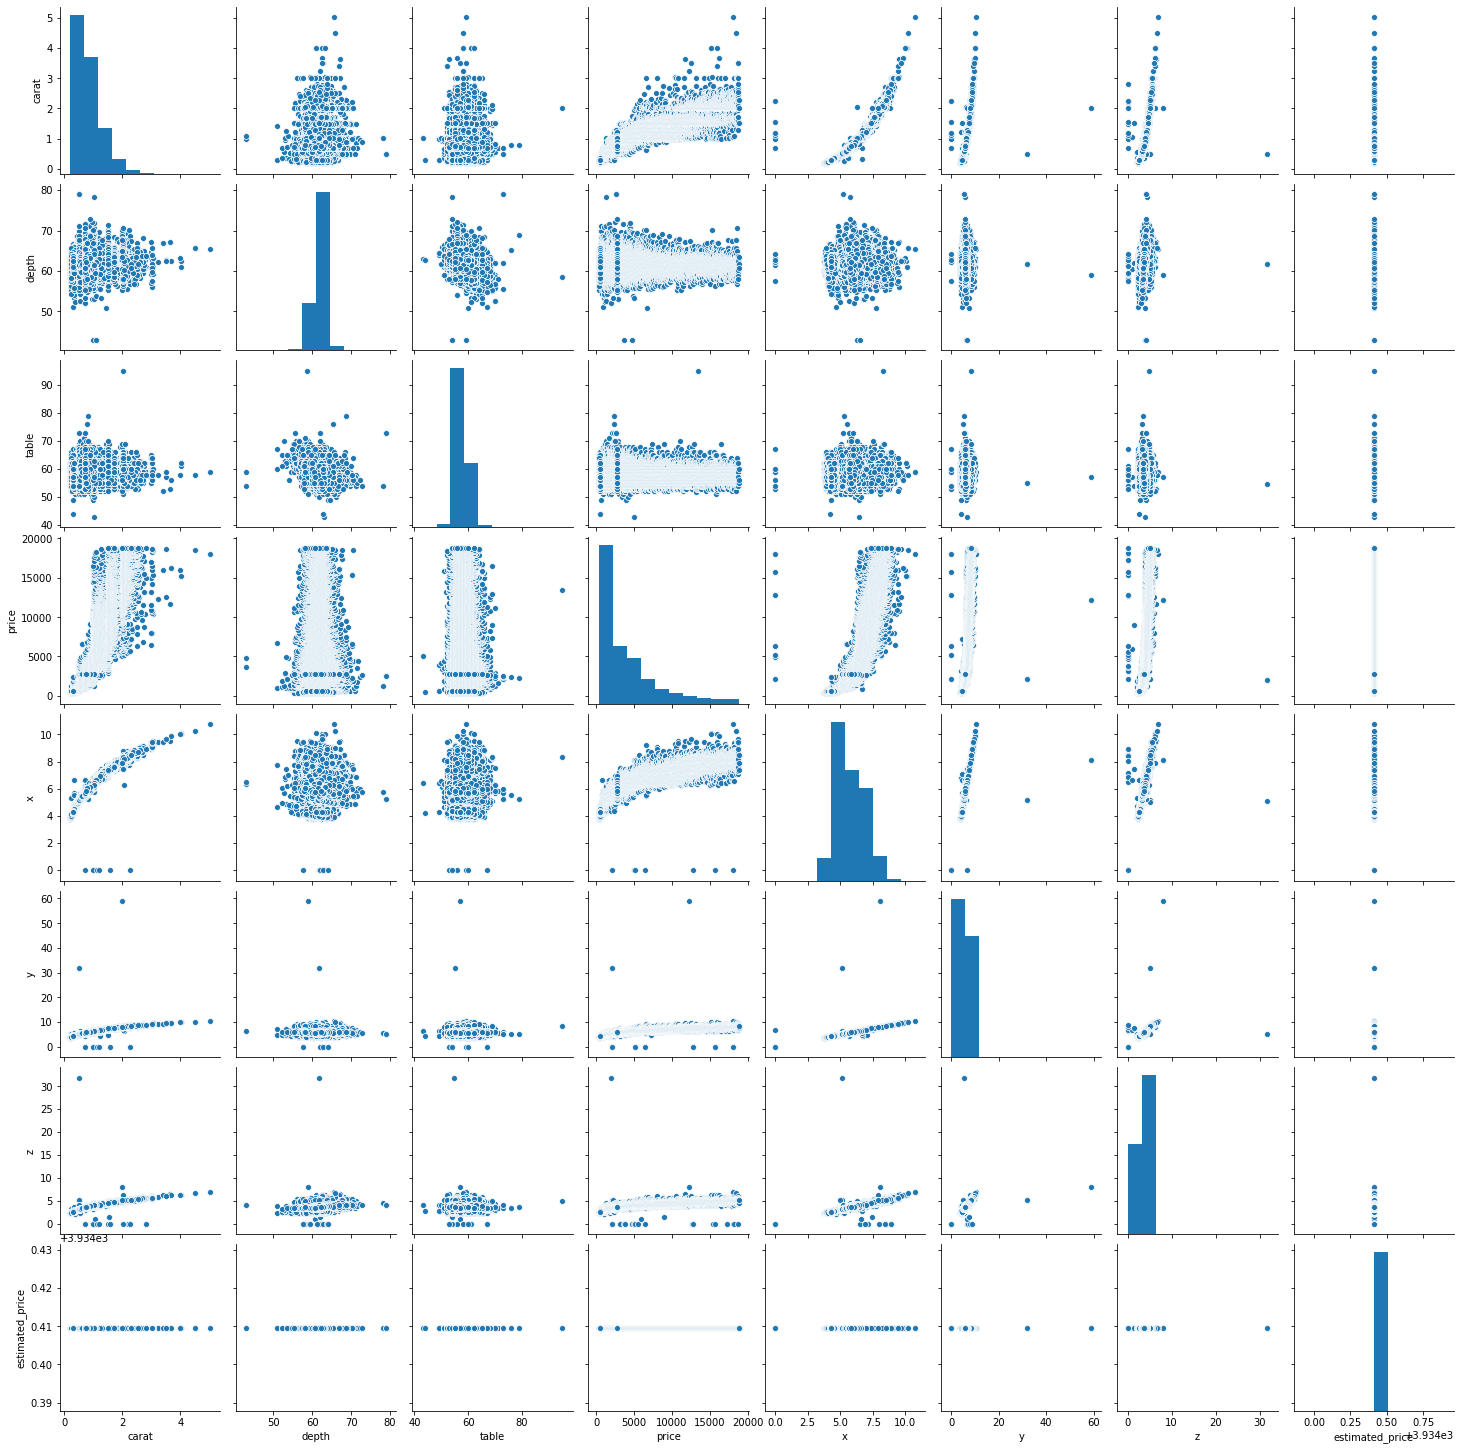

In [52]:
sns.pairplot(diamonds)

In [ ]:
#Graphs are not giving any insights to work with

In [ ]:
sns.factorplot(x='cut', data=diamonds , kind='count',aspect=2.5 )

In [ ]:
#Ideal seems to have more units than others. Fair is the least common

In [ ]:
sns.factorplot(x='color', data=diamonds , kind='count',aspect=2.5 )

In [ ]:
sns.factorplot(x='color', y='price', data=diamonds, kind='box' ,aspect=2.5 )

In [ ]:
sns.factorplot(x='clarity', data=diamonds , kind='count',aspect=2.5)

In [ ]:
sns.factorplot(x='clarity', y='price', data=diamonds, kind='box' ,aspect=2.5)

In [ ]:
corr = diamonds.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [ ]:
diamonds.describe()

## Exporting data to CSV

In [ ]:
rick.to_csv('rick_price_predicted.csv',index=False)